<a href="https://colab.research.google.com/github/agrigoridou/Online-Shopping-Intention-Analysis-ML-Project/blob/main/online_shoppers_intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports & Basic Setup

In [ ]:
# Βασικά πακέτα ανάλυσης δεδομένων
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Warnings off
import warnings
warnings.filterwarnings("ignore")


Load Dataset

In [1]:
# Φόρτωση dataset
import pandas as pd

df = pd.read_csv("/content/online_shoppers_intention.csv")
df.head()



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Basic Info + Missing Values

In [2]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


Basic Statistics

In [3]:
df.describe(include='all')


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


Label Encoding (μετατροπή κατηγορικών σε αριθμούς)

In [5]:
from sklearn.preprocessing import LabelEncoder

# Αντιγραφή dataframe
data = df.copy()

# Label Encoding για Month & VisitorType
le = LabelEncoder()
cat_cols = ["Month", "VisitorType"]

for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Boolean σε 0/1
data["Weekend"] = data["Weekend"].astype(int)
data["Revenue"] = data["Revenue"].astype(int)

data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


Correlation Heatmap

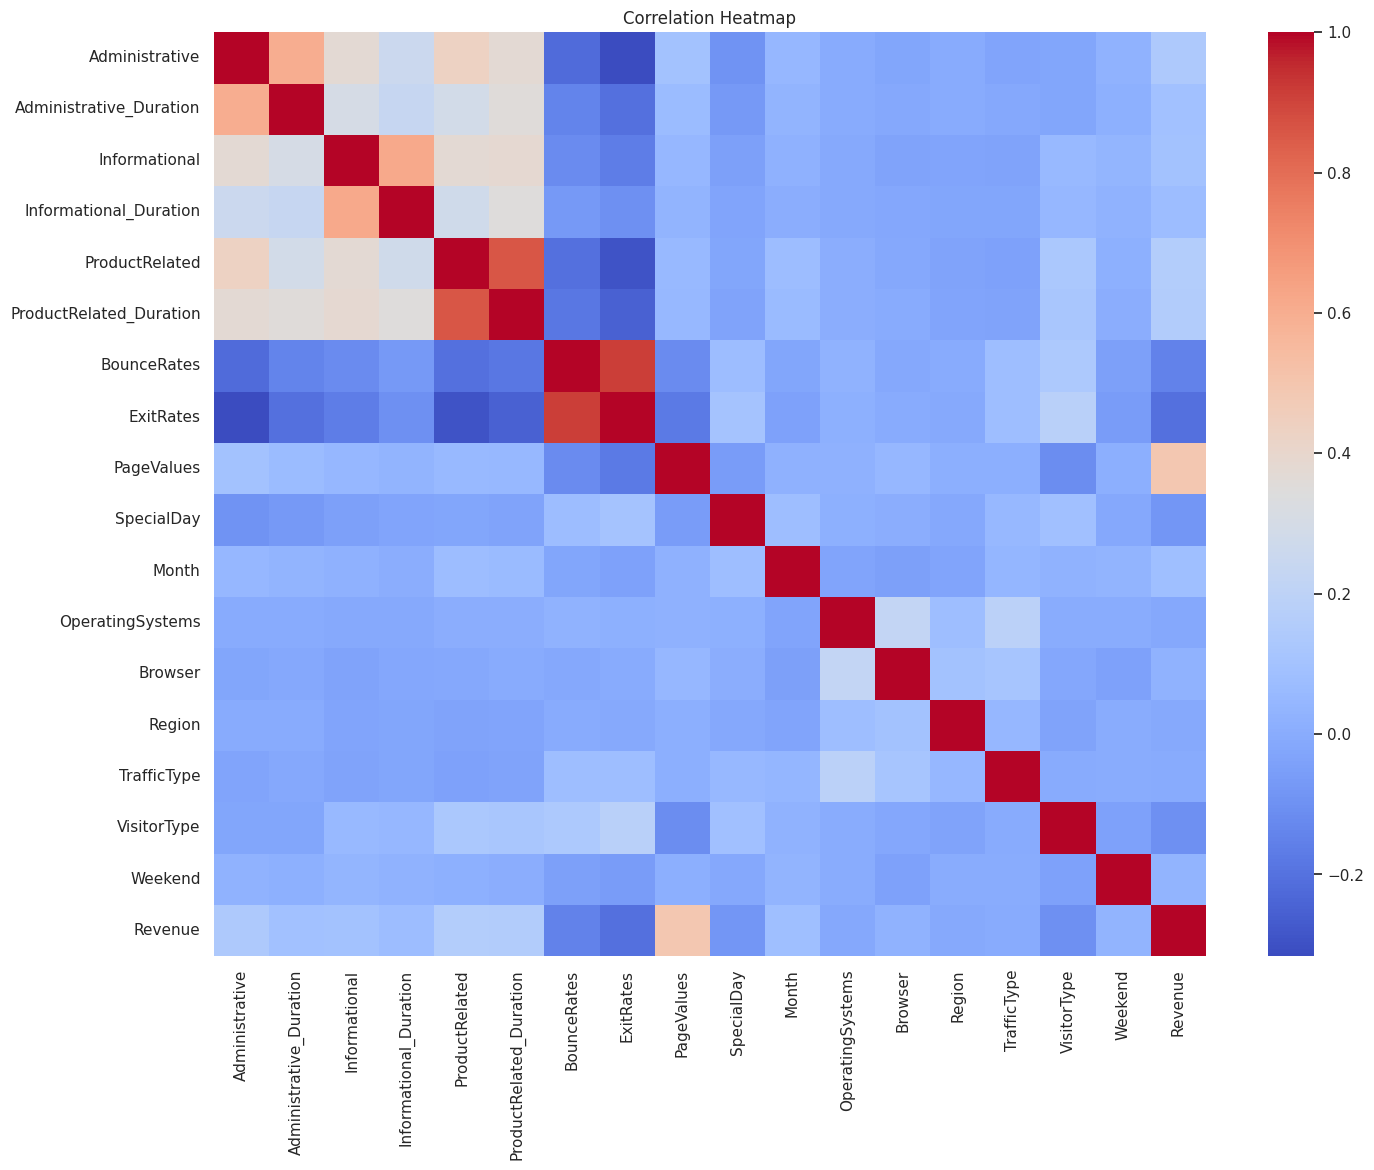

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Pairplot / Exploratory Visualizations

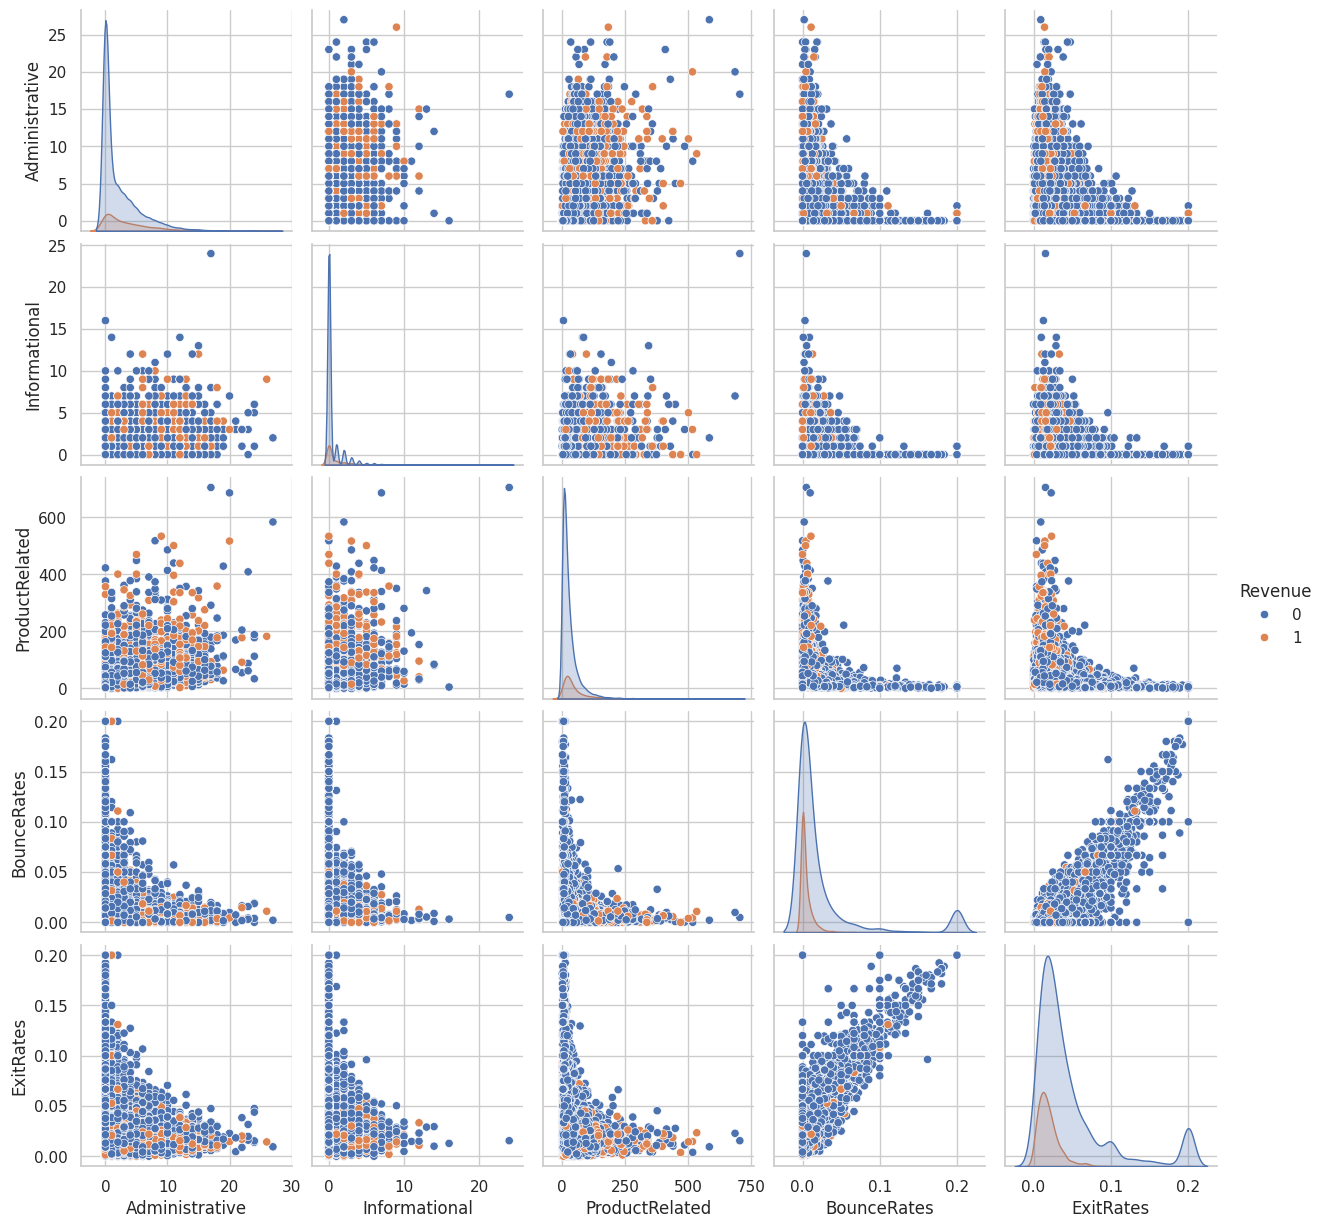

In [8]:
sns.pairplot(data[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'Revenue']], hue='Revenue')
plt.show()


Define X and y

In [9]:
X = data.drop("Revenue", axis=1)
y = data["Revenue"]


Train/Test Split

In [13]:
from sklearn.model_selection import train_test_split



# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())


X_train shape: (9864, 17)
X_test shape: (2466, 17)
y_train distribution:
 Revenue
0    8338
1    1526
Name: count, dtype: int64


Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

# Standard scaling των features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (9864, 17)
X_test_scaled shape: (2466, 17)


Logistic Regression Model

Accuracy: 0.8832116788321168

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.76      0.36      0.49       382

    accuracy                           0.88      2466
   macro avg       0.83      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



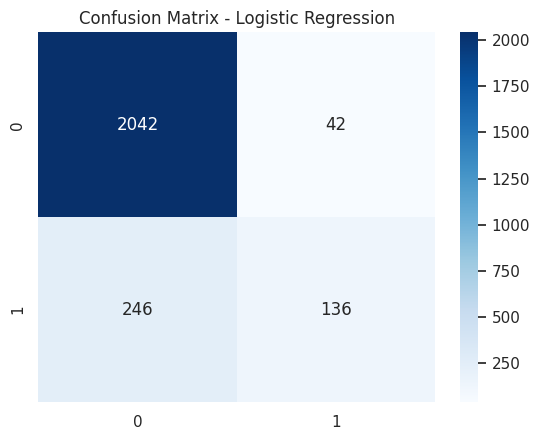

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Random Forest Model

Accuracy: 0.9006488240064883

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.73      0.57      0.64       382

    accuracy                           0.90      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.90      0.90      2466



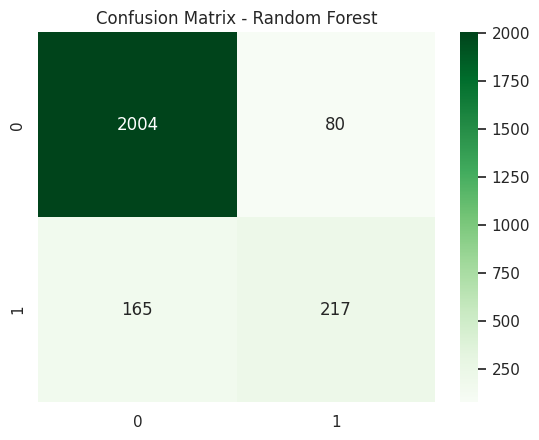

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Feature Importance (Random Forest)

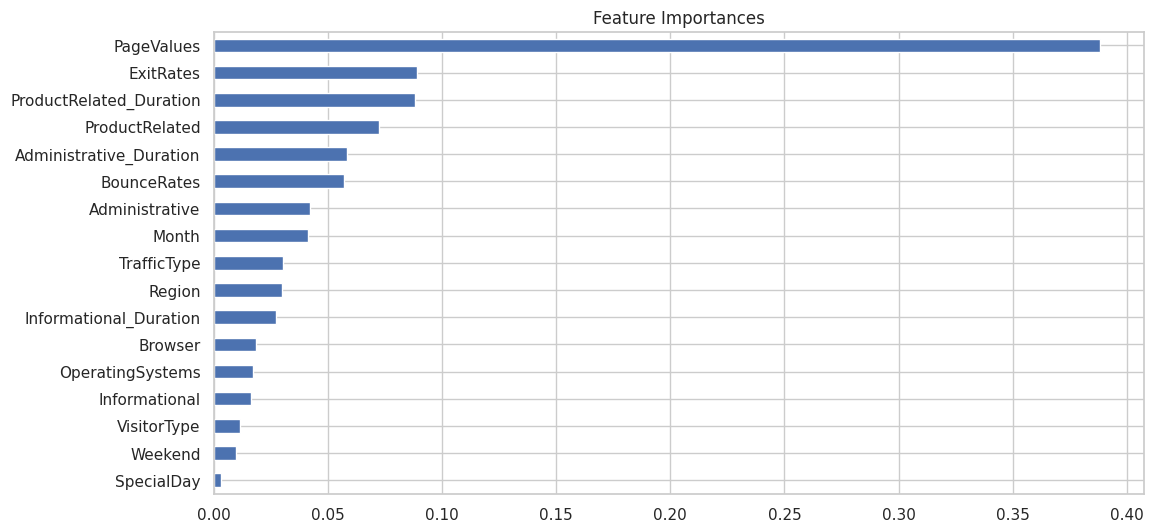

In [21]:
importances = pd.Series(rf.feature_importances_, index=X.columns)

plt.figure(figsize=(12,6))
importances.sort_values().plot(kind="barh")
plt.title("Feature Importances")
plt.show()


Save Model for Deployment

In [22]:
import joblib

joblib.dump(rf, "shopping_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

Predict on Custom User Input (Interactive Example)

In [23]:
sample = X_test.iloc[0:1]
print("Sample Input:")
print(sample)

sample_scaled = scaler.transform(sample)

print("\nRandom Forest Prediction:", rf.predict(sample)[0])
print("Logistic Regression Prediction:", log_model.predict(sample_scaled)[0])


Sample Input:
      Administrative  Administrative_Duration  Informational  \
4722               1                      4.0              0   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
4722                     0.0              13               161.166667   

      BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
4722     0.024615   0.061538         0.0         0.6      6                 2   

      Browser  Region  TrafficType  VisitorType  Weekend  
4722        5       9            5            2        0  

Random Forest Prediction: 0
Logistic Regression Prediction: 0
